In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

# Part 1:

In [2]:
def get_data_matrix(filename):
    with open(filename, newline='') as file:
        reader = csv.reader(file, delimiter=' ')
        X = []
        for row in reader:
            X.append(np.float64(row))
    X = np.asarray(X)
    return X

In [3]:
def center_data(X):
    return X - np.sum(X, axis=0) / X.shape[0]

[9.94340494 0.82624201]
Energy in first component:0.923280492599342
Energy in second component:0.07671950740065808


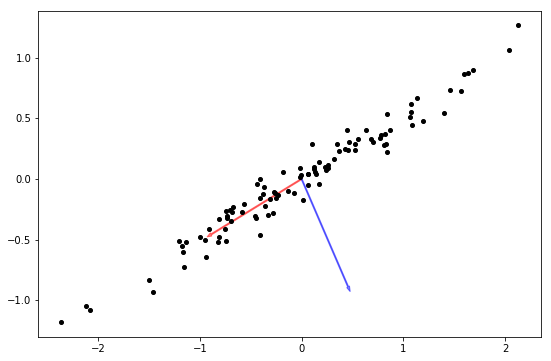

In [4]:
X = get_data_matrix('pca_dataset.txt')
X = center_data(X)
plt.figure(figsize=(9,6))
plt.plot(X.T[0],X.T[1],'ko', linestyle=' ', markersize=4)

# Apply SVD on the data matrix
u, s, vh = np.linalg.svd(X, 0)

plt.arrow(0, 0, vh[0, 0], vh[0, 1], width=0.01, color='red', alpha=0.5)
plt.arrow(0, 0, vh[1, 0], vh[1, 1], width=0.01, color='blue', alpha=0.5)
print(s)
print('Energy in first component:' + str(np.sum(s[0]/np.sum(s))))
print('Energy in second component:' + str(np.sum(s[1]/np.sum(s))))

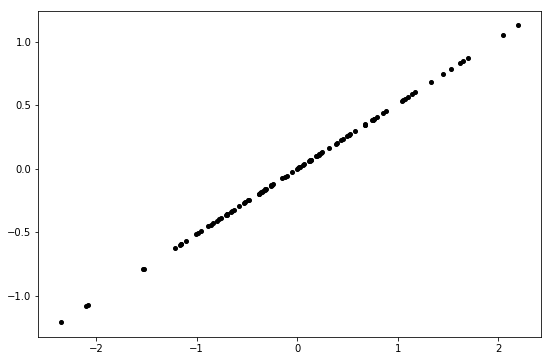

In [5]:
S = np.diag(s)
S[1,1] = 0
new_X = u @ S @ vh
plt.figure(figsize=(9,6))
plt.plot(new_X.T[0],new_X.T[1],'ko', linestyle=' ', markersize=4)

# Part 2:

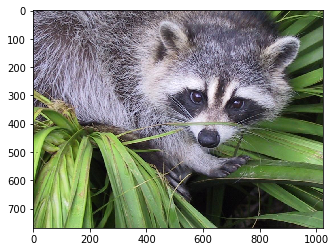

(768, 1024, 3)


In [6]:
face = scipy.misc.face()
plt.imshow(face)
plt.show()
print(face.shape)

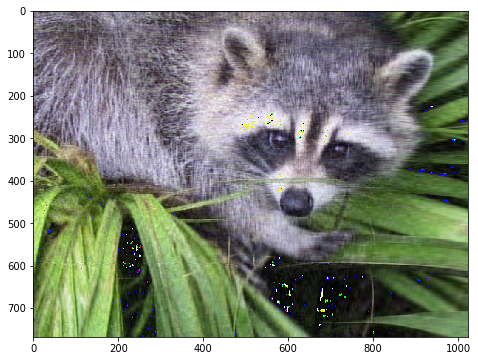

In [7]:
L = 50
r,c,rgb = face.shape
X = face.reshape(r,c*rgb)
u, s, vh = np.linalg.svd(X, 0)
for i in range(L, s.shape[0]):
    s[i] = 0
new_X= u @ np.diag(s) @ vh
new_X = new_X.reshape(r,c,rgb).astype(np.uint8) 
plt.figure(figsize=(9,6))
plt.imshow(new_X)
plt.show()

In [8]:
X = face.reshape(c,r*rgb)
u, s, vh = np.linalg.svd(X, 0)
for i in range(1, s.shape[0]):
    loss = 1 - np.sum(s[:i]/np.sum(s))
    if loss<0.01:
        print('L=' + str(i))
        break

L=701


# Part 3:

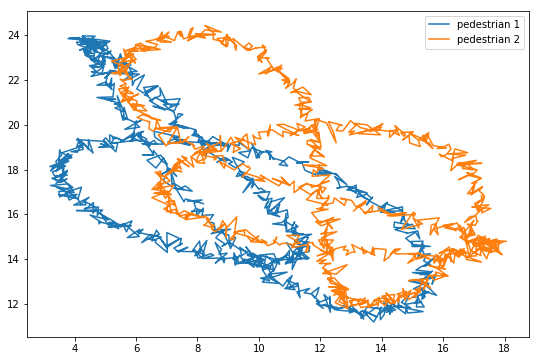

In [9]:
X = get_data_matrix('data_DMAP_PCA_vadere.txt')


plt.figure(figsize=(9,6))
plt.plot(X.T[0],X.T[1])
plt.plot(X.T[2],X.T[3])
plt.legend(['pedestrian 1', 'pedestrian 2'])

Loss=0.049044915700634295


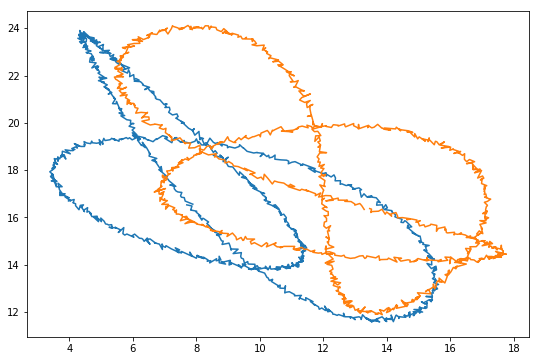

In [10]:
L = 4
u, s, vh = np.linalg.svd(X, 0)
loss = 1 - np.sum(s[:L]/np.sum(s))
for i in range(L, s.shape[0]):
    s[i] = 0
new_X = u @ np.diag(s) @ vh
print('Loss=' + str(loss))
plt.figure(figsize=(9,6))
plt.plot(new_X.T[0],new_X.T[1])
plt.plot(new_X.T[2],new_X.T[3])